# Imputting like a data scientist

## Completing the required setup:

In [3]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
# Data analysis
import statistics as stat
import scipy.stats as stats
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as smx
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
# Predictive data analysis: outlier imputation
from sklearn.impute import SimpleImputer
# Predictive data analysis: KNN NA imputation
from sklearn.impute import KNNImputer
# Predictive data analysis: experimental iterative NA imputer (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Predictive data analysis: Classifying nearest neighbors
from sklearn import neighbors
# Predictive data analysis: Plotting decision regions
from mlxtend.plotting import plot_decision_regions

# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

## Load and Examine a Data set:

In [4]:
# Read csv 
data = pd.read_csv("spam.csv")

# Create Age_group from the age column
def Spam_or_not_data(data): 
  if data.yesno == "y": return "Spam"
  else: return "Not a spam"

# Apply the function to data
data['Spam_or_not'] = data.apply(Spam_or_not_data, axis = 1)

# What does the data look like
data.head()

,crl.tot,dollar,bang,money,n000,make,yesno,Spam_or_not
0,278,0.000,0.778,0.00,0.00,0.00,y,Spam
1,1028,0.180,0.372,0.43,0.43,0.21,y,Spam
2,2259,0.184,0.276,0.06,1.16,0.06,y,Spam
3,191,0.000,0.137,0.00,0.00,0.00,y,Spam
4,191,0.000,0.135,0.00,0.00,0.00,y,Spam


## Diagnosing the data:

In [6]:
# What are the properties of the data
diagnose = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crl.tot      4601 non-null   int64  
 1   dollar       4601 non-null   float64
 2   bang         4601 non-null   float64
 3   money        4601 non-null   float64
 4   n000         4601 non-null   float64
 5   make         4601 non-null   float64
 6   yesno        4601 non-null   object 
 7   Spam_or_not  4601 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 287.7+ KB


## Diagnozing the outliers:

There are several numerical variables that have outliers above, let’s see what the data look like with and without them

Create a table with columns containing outliers

Plot outliers in a box plot and histogram

In [8]:
# Make a copy of the data 
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)
  
  # Calculate the outlier cutoff 
  cut_off = IQR * 1.5
  
  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  # Print the values
  print(' ')
  
  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25=', q25, 'q75=', q75, 'IQR=', IQR)
  
  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())



 
crl.tot q25= 35.0 q75= 266.0 IQR= 231.0
lower, upper: -311.5 612.5
Number of Outliers:  550
 
dollar q25= 0.0 q75= 0.052 IQR= 0.052
lower, upper: -0.078 0.13
Number of Outliers:  811
 
bang q25= 0.0 q75= 0.315 IQR= 0.315
lower, upper: -0.473 0.788
Number of Outliers:  411
 
money q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  735
 
n000 q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  679
 
make q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  1053


## Basic Exploration of Missing Values (NAs):

In [10]:
dataNA = data

for col in dataNA.columns:
    dataNA.loc[dataNA.sample(frac = 0.1).index, col] = np.nan
    
dataNA.isnull().sum()

crl.tot        866
dollar         888
bang           871
money          873
n000           873
make           867
yesno          873
Spam_or_not    881
dtype: int64

Bar plot showing all NA values in each column. Since we randomly produced a set amount above the numbers will all be the same.

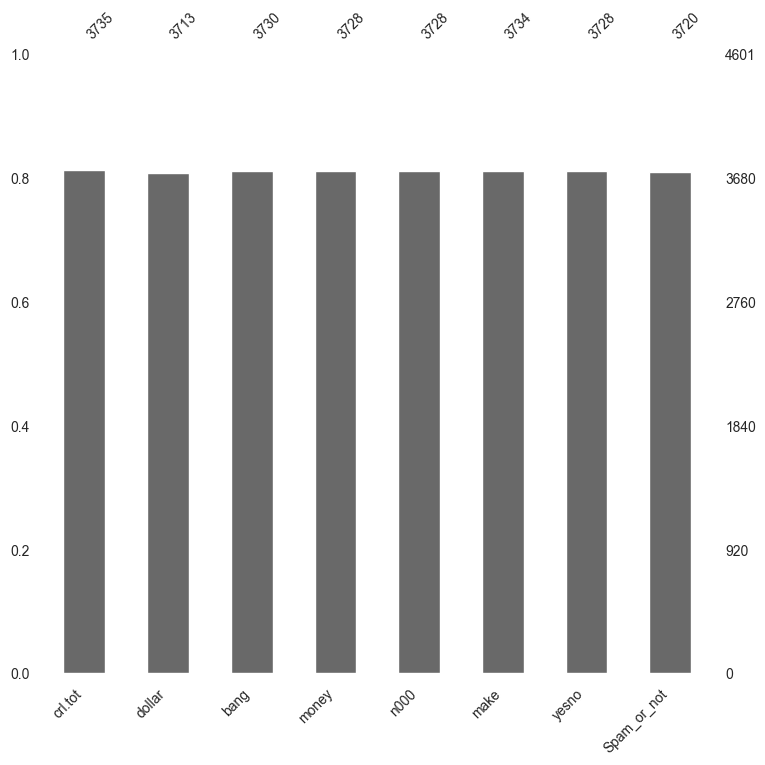

In [12]:
msno.bar(dataNA, figsize = (8, 8), fontsize = 10)
plt.tight_layout()

## Advanced Exploration of Missing Values (NAs):

Bar plot showing all NA values in each column. Since we randomly produced a set amount above the numbers will all be the same.

<Axes: >

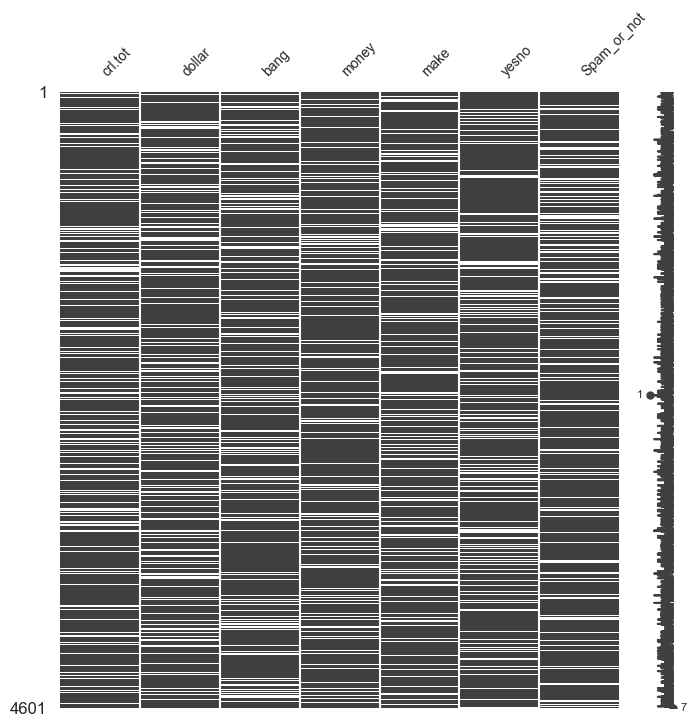

In [36]:
dataNA1 = dataNA.drop('n000', axis = "columns")

# NA matric
msno.matrix(dataNA1, figsize = (8, 8), fontsize = 10)

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0.5, 'Spam_or_not')]

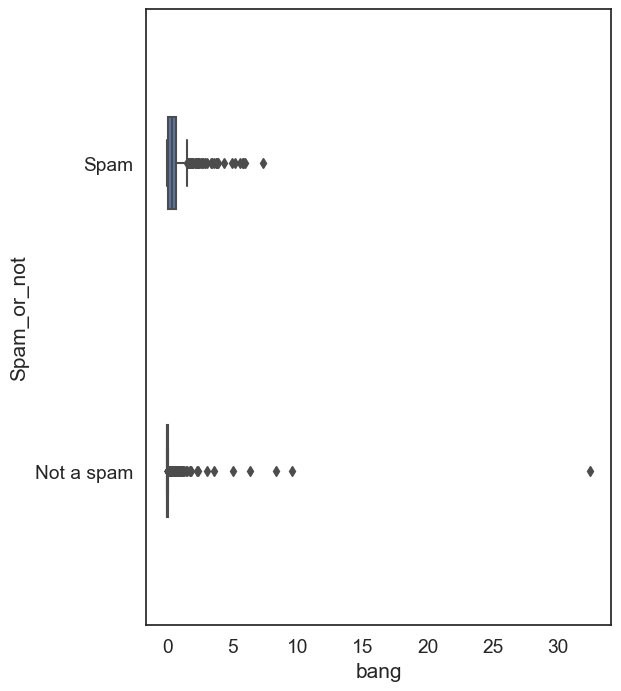

In [37]:
# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(6, 8)})

# Change theme to "white"
sns.set_style("white")

# Box plot
Age_Box = sns.boxplot(data = data, x = "bang", y = "Spam_or_not", width = 0.3)

# Tweak the visual presentation
Age_Box.set(ylabel = "Spam_or_not")

In [29]:
# Select only bang
BangModified = data.filter(["bang"], axis = "columns")

## Mean Imputation:

The mode of the observed values for each variable is computed and the outliers for that variable are imputed by this mode

In [38]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
BangModified.loc[BangModified.bang > 5, 'bang'] = np.nan

# Set mean imputation algorithm
Mean_Impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Fit imputation
Mean_Impute = Mean_Impute.fit(BangModified[['bang']])

# Transform NAs with the mean imputation
BangModified['Ins_Mean'] = Mean_Impute.transform(BangModified[['bang']])

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

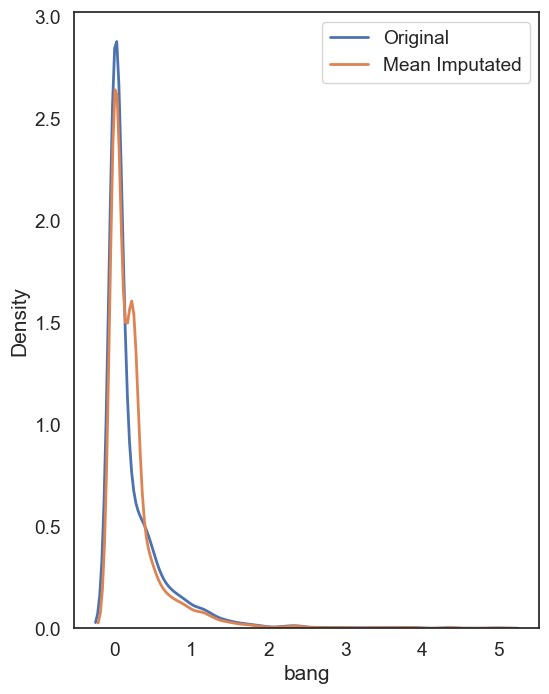

In [40]:
# Visualization of the mean imputation
# Original data
mean_plot = sns.kdeplot(data = BangModified, x = 'bang', linewidth = 2, label = "Original")

# Mean imputation
mean_plot = sns.kdeplot(data = BangModified, x = 'Ins_Mean', linewidth = 2, label = "Mean Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

## Median Imputation:

The median of the observed values for each variable is computed and the outliers for that variable are imputed by this median

In [41]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
BangModified.loc[BangModified.bang > 5, 'bang'] = np.nan

# Set median imputation algorithm
Median_Impute = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Fit imputation
Median_Impute = Median_Impute.fit(BangModified[['bang']])

# Transform NAs with the median imputation
BangModified['Ins_Median'] = Median_Impute.transform(BangModified[['bang']])

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

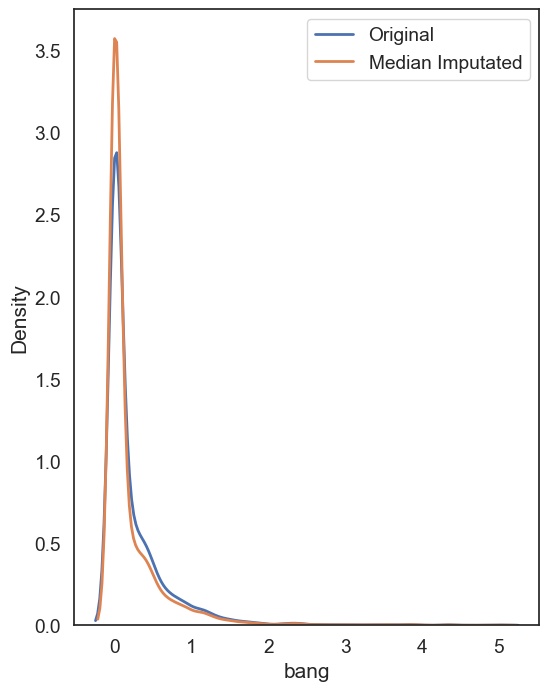

In [42]:
# Visualization of the median imputation
# Original data
median_plot = sns.kdeplot(data = BangModified, x = 'bang', linewidth = 2, label = "Original")

# Median imputation
median_plot = sns.kdeplot(data = BangModified, x = 'Ins_Median', linewidth = 2, label = "Median Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

## Mode Imputation:

The mode of the observed values for each variable is computed and the outliers for that variable are imputed by this mode

In [45]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
BangModified.loc[BangModified.bang > 5, 'bang'] = np.nan

# Set mode imputation algorithm
Mode_Impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Fit imputation
Mode_Impute = Mode_Impute.fit(BangModified[['bang']])

# Transform NAs with the mode imputation
BangModified['Bang_Modified'] = Mode_Impute.transform(BangModified[['bang']])

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

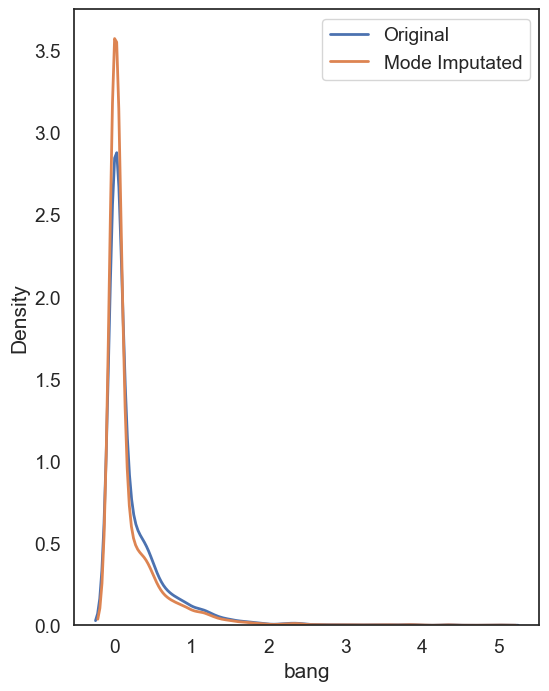

In [46]:
# Visualization of the mode imputation
# Original data
mode_plot = sns.kdeplot(data = BangModified, x = 'bang', linewidth = 2, label = "Original")

# Mode imputation
mode_plot = sns.kdeplot(data = BangModified, x = 'Bang_Modified', linewidth = 2, label = "Mode Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

## Capping Imputation (aka Winsorizing):

The Percentile Capping is a method of Imputing the outlier values by replacing those observations outside the lower limit with the value of 5th percentile and those that lie above the upper limit, with the value of 95th percentile of the same dataset.

In [47]:
# Winsorizing deals specifically with outliers, so we don't have to worry about changing outliers to NAs

# New column for capping imputated data at the lowest and highest 10% of values
BangModified['Bang_cap'] = pd.DataFrame(stats.mstats.winsorize(BangModified['bang'], limits = [0.05, 0.05]))

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

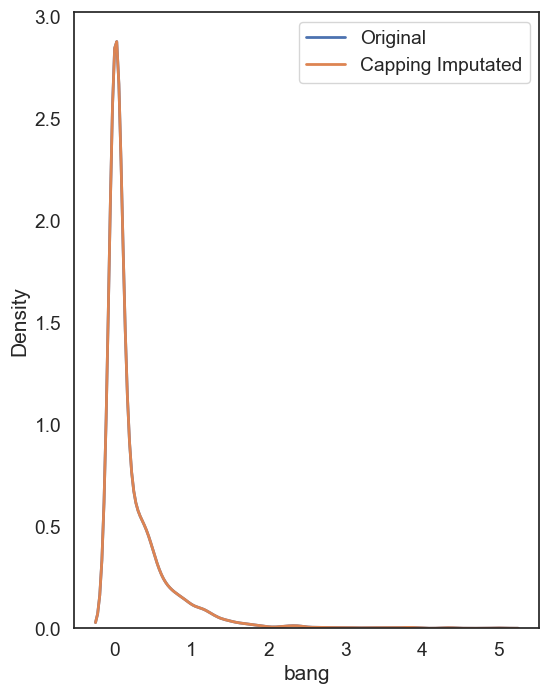

In [49]:
# Visualization of the capping imputation
# Original data
cap_plot = sns.kdeplot(data = BangModified, x = 'bang', linewidth = 2, label = "Original")

# Capping imputation
cap_plot = sns.kdeplot(data = BangModified, x = 'Bang_cap', linewidth = 2, label = "Capping Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

## Imputing NAs

I will only be addressing a subset of methods for NA imputation, but you can use the mean, median, and mode methods from above as well:

KNN: K-nearest neighbors
MICE: Multivariate Imputation by Chained Equations

In [50]:
# Make a copy of the data 
dataCopy = data.copy()

# Select the Insulin 
InsNA = dataNA.filter(["bang"], axis = "columns")

# Add Insulin with NAs to copy of original data
dataCopy['bang'] = InsNA

## K nearest neighbor(KNN) Imputation:


KNN is a machine learning algorithm that classifies data by similarity. This in effect clusters data into similar groups. The algorithm predicts values of new data to replace NA values based on how closely they resembles training data points, such as by comparing across other columns.

Here’s a visual example using the plot_decision_regions function from mlxtend.plotting library to run a KNN algorithm on our dataset, where three clusters are created by the algorithm.

In [51]:
# KNN plot function
def knn_comparision(data, k):
  # Define x and y values (your data will need to have these)
    X = data[['x1','x2']].values
    y = data['y'].astype(int).values
    # Knn function, defining the number of neighbors
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    # Fit knn algorithm to data
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf = clf, legend = 2)

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [56]:
def Spam_conversion(data):
    if data.yesno =='y':
        return 1
    else: return 0

data['Spam_converted']= data.apply(Spam_conversion, axis=1)

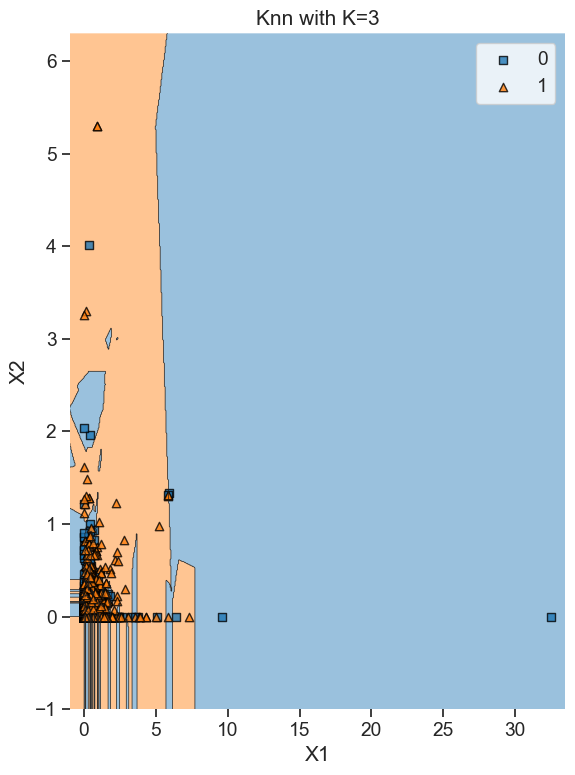

In [57]:
# Prepare data for the KNN plotting function
data1 = data.loc[:, ['bang', 'dollar', 'Spam_converted']]

# Drop NAs
data1 = data1.dropna()

# Set the two target x variables and the binary y variable we are clustering the data from
data1 = data1.rename(columns = {'bang': 'x1', 'dollar': 'x2', 'Spam_converted': 'y'})

# Create KNN plot for 3 nearest neighbors
knn_comparision(data1, 3)

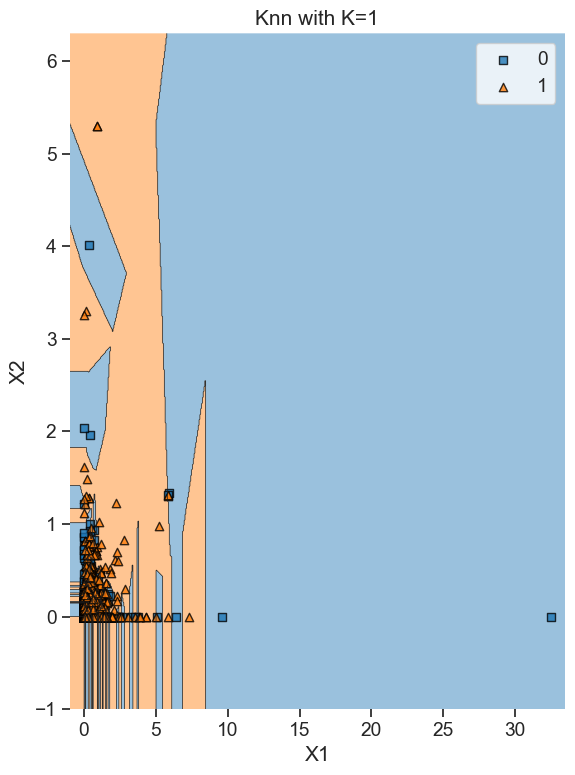

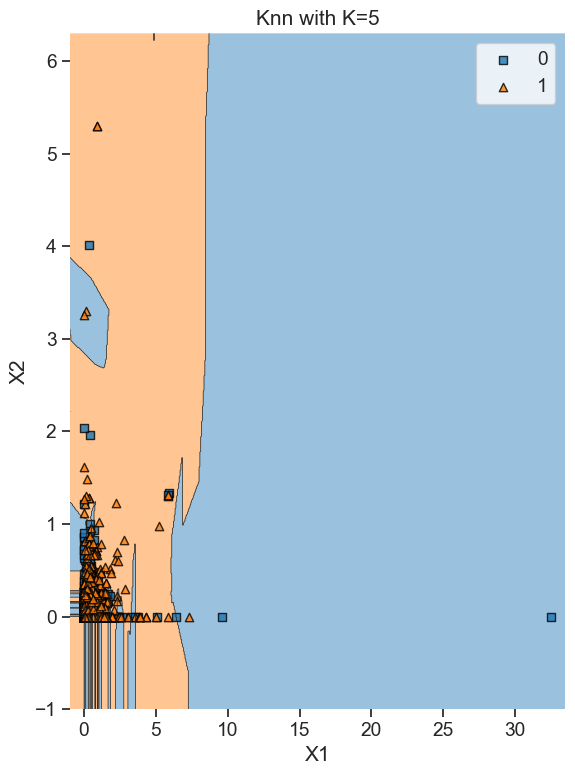

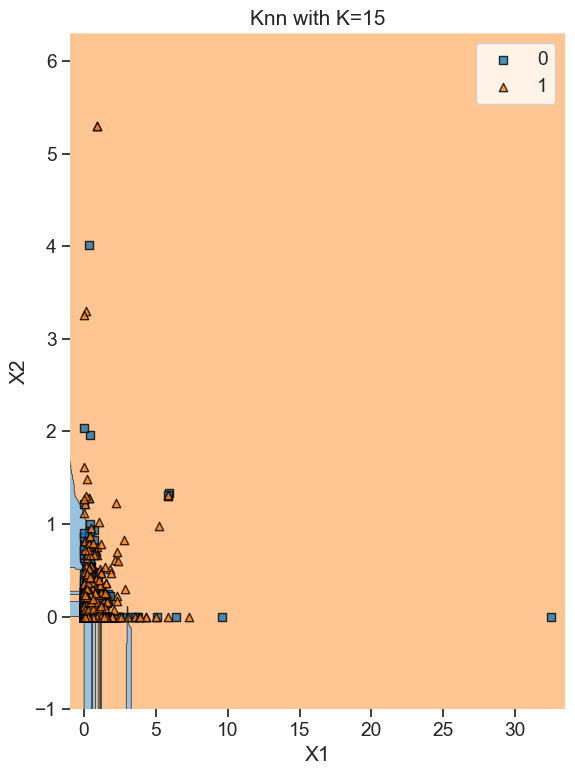

In [58]:
# Loop to create KNN plots for i number of nearest neighbors
for i in [1, 5, 15]:
  knn_comparision(data1, i)

In [60]:
# Numeric dummy variable from our Age_group ordinal column
# Define the orginal encoder 
enc = pproc.OrdinalEncoder()

# Ordinal variable from Age_group column 
dataCopy[['Spam_or_not']] = enc.fit_transform(dataCopy[['Spam_or_not']])

In [61]:
# Reorder columns
dataCopy = dataCopy[['crl.tot','dollar','bang','money','n000','make']]

In [62]:
# Min-max schaler
scaler = pproc.MinMaxScaler()

# Scale columns
dataCopy_Scale = pd.DataFrame(scaler.fit_transform(dataCopy), columns = dataCopy.columns)

In [63]:
# Set KNN imputation function parameters
imputer = KNNImputer(n_neighbors = 3)

# Fit imputation
DataKnn = pd.DataFrame(imputer.fit_transform(dataCopy_Scale),columns = dataCopy_Scale.columns)

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

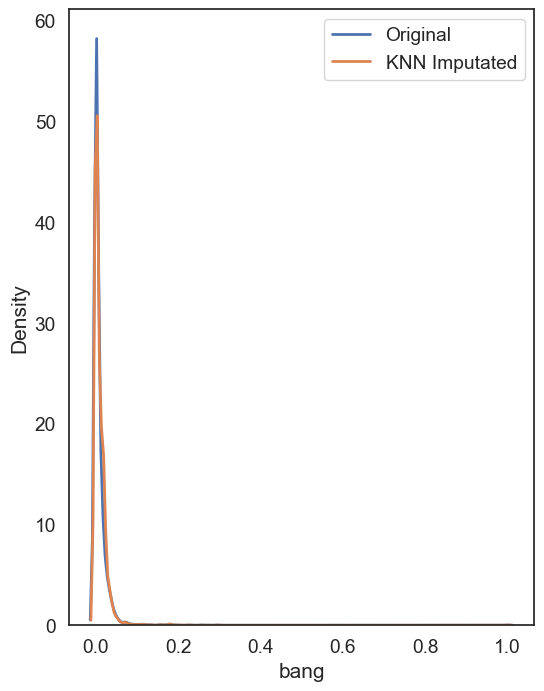

In [64]:
# Add KNN imputated column to original dataCopy
dataCopy_Scale[['InsKnn']] = DataKnn[['bang']]

# Visualization of the KNN imputation
# Original data
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'bang', linewidth = 2, label = "Original")

# KNN imputation
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'InsKnn', linewidth = 2, label = "KNN Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

Pros & Cons of Using KNN Imputation
Pro:

Possibly much more accurate than mean, median, or mode imputation for some data sets.
Cons:

KNN is computationally expensive because it stores the entire training dataset into computer memory.

KNN is very sensitive to outliers, so you would have to imputate these first.



## Multivariate Imputation by Chained Equations (MICE):

MICE is an algorithm that fills missing values multiple times, hence dealing with uncertainty better than other methods. This approach creates multiple copies of the data that can then be analyzed and then pooled into a single dataset.

In [65]:
# Assign a regression model
lm = LinearRegression()

# Set MICE imputation function parameters
imputer = IterativeImputer(estimator = lm, missing_values = np.nan, max_iter = 10, verbose = 2, imputation_order = 'roman', random_state = 0)

# Fit imputation
dataMice = pd.DataFrame(imputer.fit_transform(dataCopy),columns = dataCopy.columns)

[IterativeImputer] Completing matrix with shape (4601, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 1102.7602388751523, scaled tolerance: 15.841000000000001 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.04
[IterativeImputer] Change: 291.58660501692833, scaled tolerance: 15.841000000000001 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeImputer] Change: 68.09365997479992, scaled tolerance: 15.841000000000001 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.06
[IterativeImputer] Change: 10.22211681108763, scaled tolerance: 15.841000000000001 
[IterativeImputer] Early stopping criterion reached.


C:\Users\Pranshu\AppData\Local\Temp\ipykernel_24388\406706926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCopy[['InsMice']] = dataMice[['bang']]
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranshu\AppData\Roaming\Py

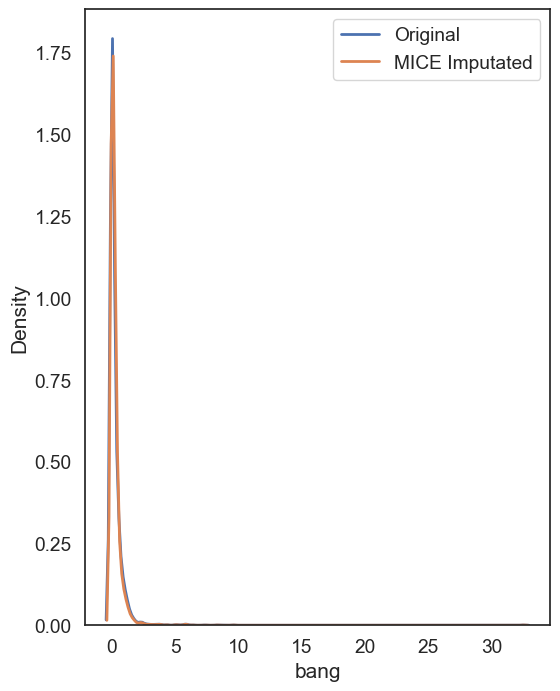

In [67]:
# Add MICE imputated column to original dataCopy
dataCopy[['InsMice']] = dataMice[['bang']]

# Visualization of the MICE imputation
# Original data
mice_plot = sns.kdeplot(data = dataCopy, x = 'bang', linewidth = 2, label = "Original")

# MICE imputation
mice_plot = sns.kdeplot(data = dataCopy, x = 'InsMice', linewidth = 2, label = "MICE Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

Pros:

Multiple imputations are more accurate than a single imputation.

The chained equations are very flexible to data types, such as categorical and ordinal.

Cons:

You have to round the results for ordinal data because resulting data points are too great or too small (floating-points).